# Class 10: Introduction to Machine Learning

## Introduction

Machine learning (ML) is the study of computer programs that can learn by example. The algorithm behind them can generalize from existing examples to other cases, unknown to it at the start. A classic example involves the classification of images of cats and dogs - the algorithm has a _training dataset_ which consists of many images of cats and dogs, with their proper label. Following the training its given a new set of unseen images and we see how well it can classify these. Nowadays modern algorithms can achieve human-level performance in these types of tasks after not much training.

ML is useful when we, as programmers, have a hard time defining the "rules" that the computer should follow when encountering new data. Let's take speech-to-text as an example. We can create a large database mapping the "sound" of words to their corresponding text. But this simple database will have a hard time when a person with a different accent or pronunciation will say the same word, or when we say the same word in the past tense. These small but important deviations from the data in the database might suggest that this naive approach won't work. Indeed, speech-to-text improved dramatically in recent years only due to new machine learning algorithms that were developed, specifically in the field of _deep learning_, which is a subset of ML that works using "neural networks" composed of individual units that "learn" the wanted input-output mapping.

The two main types of algorithms in the ML field are *supervised* and *unsupervised* learning algorithms. 

In __supervised__ algorithms, the machine tries to learn _target values_ to assign to its inputs. Classification is a classic example - each image has a label, and we wish for the algorithm to learn some function that matches the input to the output label. If the output isn't discrete, but continuous, this is a regression problem, but still supervised. Supervised learning always has a training dataset, many times labeled manually, that it starts its learning process from. It also has a "test" dataset, which is also labeled, with which we check the predictions of our model.

There are also implicit labels - say I'm a Google employee, and I would like to know whether you were satisfied with the results returned by some query. One approach might be to check how long after following some of the links you returned to the search results. Short times might indicate a non-helpful result, and I could try and correct the algorithm to show less of this type of results in the future.

The second type of alogrithms is **unsupervised** learning. The computer is given unlabeled inputs, and it has to "make sense" of it. It will cluster the data, find common features, patterns, etc., and finally will receive a "score" based on its output. After some training the score should improve and the algorithm will know where to place the next example it receives in that parameter space. A typical example is the recommendations of Amazon to its customers following a purchase. All you have as input are the products users looked-up and/or bought, and you try to create typical bundles of products to offer the rest of the users. If they're in fact bought together, the algorithm receives a high score for that bundle, so it'll try working with it again.

Another example of unsupervised learning is a computer learning to play a video game, let's say Mario. The computer will not understand how to play the game at the start, but it will know that it has to reach the highest score possible. High scores are given for completing a level in the fastest time and with the highest number of collected coins, so eventually the algorithm should understand how to improve its game by trial and error.

In many cases, when we try to design our ML algorithm we'll encounter the following steps:

1. Representation of data: The way we present the data to the computer is important. For some datasets it's trivial - images are inherently 2D matrices, electrode recordings from cells are vectors of voltage values - but other datasets can be trickier. For example, if we wish to learn the contents of emails, we can map each word as a key in a dictionary, with the value being the number of times it's written in that mail. This representation discards the order of the words, but gives more "weight" to high-frequency words and sentences.

2. Evaluation: What is the criterion that distinguishes good performance by the computer? If we're training a classifier, this can be the percentage of correct predictions on test data.

3. Optimization: Change parameters ("hyper-parameters") given to the algorithm to see if results improve, and re-run the tests. If we're trying to classify different types of spikes from a neuronal population, we should estimate the number of recorded components as 10, and give the parameter to the unsupervised learning algorithm as a starting point to guess the actual number of components in the data. If we actually had 15 cells which we recorded from, we better try to re-run the code with a different hyper-parameter - 15 - and see if results improve.

Before we dive in and look at an example, I want to stress that we won't be talking about the inner workings of machine learning algorithms. Instead we'll focus on using these algorithms effectively. Moreover, we won't discuss _most_ available algorithms and approaches out there, since there are so many. This should give you a glimpse into the possibilities of this very broad topic.

## Example: Fruit Classification

There are countless libraries that implement machine learning interfaces in the Python ecosystem, and everyday more and more are created. They diverge by their specific goals, implemented algorithms and API. The most popular library is `scikit-learn`, a part of the SciPy and PyData ecosystem. This means that it integrates seamlessly with `numpy`, `pandas` and `scipy`, among other important libraries. `scikit-learn` (`sklearn`) has a Python API, but its internals are written in open-source, performant C++ - a critical demand for any machine learning algorithm. Other famous libraries include Google's TensorFlow with Keras and PyTorch, but we won't be discussing them in this course.

The great example below is taken from Coursera's course "Applied Machine Learning".

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

The data is available in a `.txt` format, which means we can read it with pandas' `read_csv`:

In [2]:
CSV_PATH = "fruit_data_with_colors.txt"

fruits = pd.read_csv(CSV_PATH, sep="\t")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


The dataset contains the mass, width, height and color of each fruit. The `fruit_label` column is equal in content to the `fruit_name` column, but we usually use numbers, rather than strings, as our labels. Conforming with "clean" data practices, rows indicate an item or object and columns indicate its features.

We wish to train a classifier to identify different fruit based on *mass*, *width*, *height*, and *color_score*.

Our first concern is to split up the dataset into a training dataset and a testing dataset. `sklearn`'s [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) does just that, and we'll go with the default 25% test size:

In [3]:
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Next, let's plot a scatter matrix to qualitatively assess the interaction between our predictors.

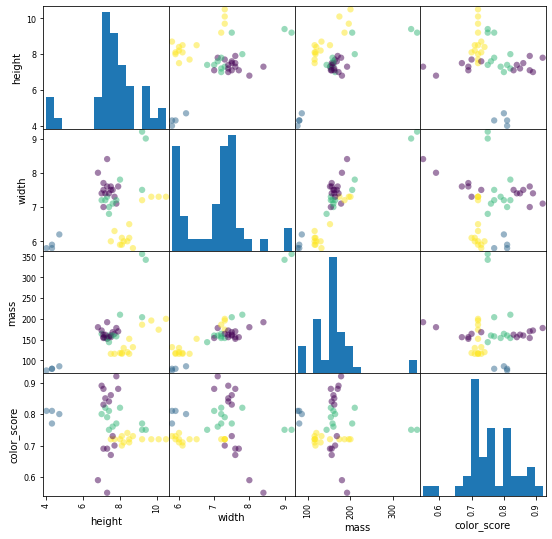

In [4]:
scatter = pd.plotting.scatter_matrix(X_train,
                                     c=y_train,
                                     marker='o',
                                     s=40,
                                     hist_kwds={'bins': 15},
                                     figsize=(9, 9))

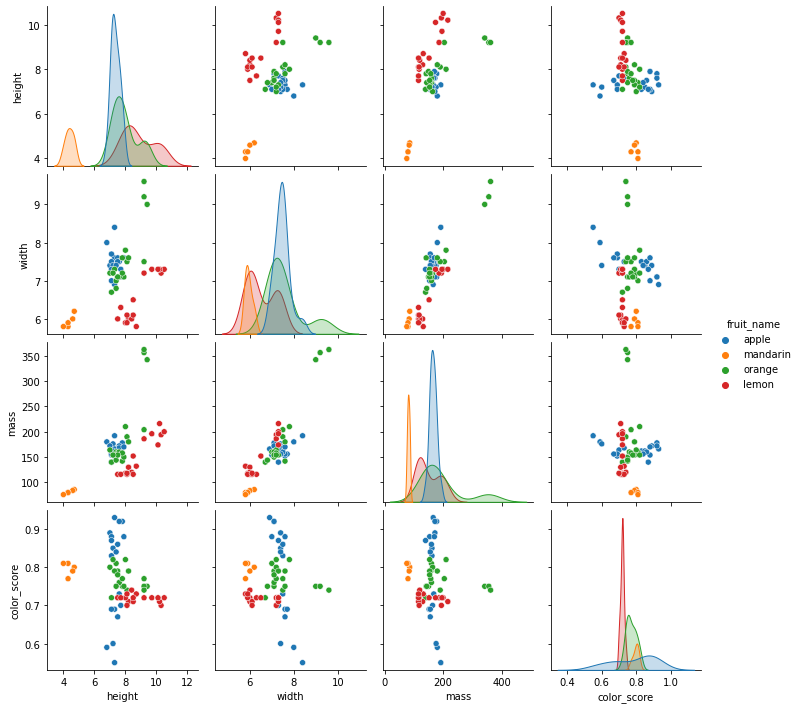

In [5]:
# Seaborn can also make this plot even prettier
_ = sns.pairplot(fruits, hue="fruit_name", vars=["height", "width", "mass", "color_score"])

This scatter matrix, a prominent feature of `pandas` and `seaborn`, is a great way to summarize the distribution of and relationship between different variables. 

The diagonal is a histogram of all values for all of the parameters. This helps us see outliers in the data, which we might want to discard.

The top triangle of the matrix is a transposition of the bottom triangle, meaning we can discard one of them entirely, or replace them with some other representation of the data. Each box is a scatter plot showing all items in our dataset. The colors indicate the different fruit type. The location of the circles is determined by the values of the pair of variables corresponding to each row and column.

We can identify features that are more indicative than other to the type of fruit in question. For example, the scatter plot for `[mass, color_score]` shows a relatively good separation between the different target labels.

We can also observe the data in 3D:

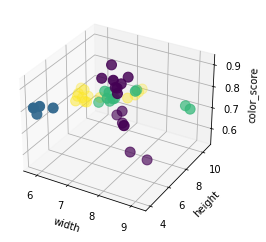

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

The algorithm we'll use to classify the data is "k-Nearest Neighbors" (kNN), which can be used both for classification (discrete) and for regression (continuous). This algorithm memorizes the entire training dataset, and when it encounters a new sample from the testing dataset it finds the *k* closest samples to the new data point. It takes the labels from the `k` samples it found and decides, usually based on a majority vote, what type of sample does the new test sample is.

The "distance" between the new test sample and the existing samples is calculated in "feature-space", i.e. the difference between each new parameter and the existing training point's parameters. The smallest total difference points to the closest data point. Let's visualize the feature-space for `k = 5`:

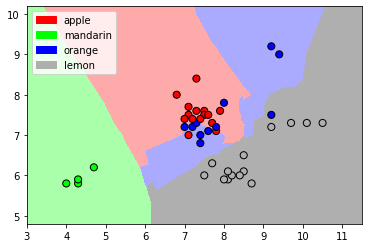

In [7]:
from adspy_shared_utilities import plot_knn_decision_boundary

plot_knn_decision_boundary(X_train, y_train, n_neighbors=5, weights="uniform")

We see a representation of how would a kNN algorithm divide this (2D) feature-space. The colored areas are assigned to a specific label.

We haven't run our algorithm yet, though. So let's do so now.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

And... we're done. The model is now trained with our training dataset. The "minkowski" metric is a fancy name for the more famous "Euclidean" metric (with `p = 2`). This is the metric used to calculate the distance between new and existing points, and it's a simple squared difference in all dimensions:

$$
d = \sqrt{(n - e)^2_{\text{width}} + (n - e)^2_{\text{height}} + ...}
$$

With *d* being the distance, *n* the new measurement and *e* the existing one.

Let's see how well we did using the previously-untouched test dataset:

In [9]:
knn.score(X_test, y_test)

0.5333333333333333

53% success rate. Not too bad.

We're also interested in the choice for the value of `k`. Why did we choose 5? would a different `k` perform better? This is an essential part when dealing with ML models. We also change the hyper-parameters to see if we reached some sort of maximum.

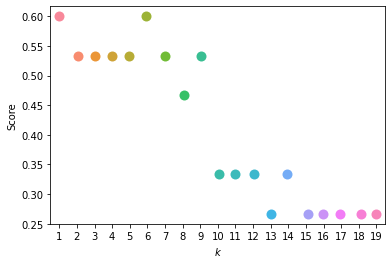

In [12]:
k_range = range(1,20)

scores_k = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores_k.append(knn.score(X_test, y_test))

scores_data = pd.DataFrame({"$k$": k_range, "Score": scores_k})
_ = sns.stripplot(data=scores_data, x="$k$", y="Score", size=10)

In our case `k = 1` and `k = 6` are equally good. When the dataset is larger and the training process takes longer, we usually just sample a few `k`'s to make sure we're not stuck in a local `k` minimum.

We'd also want to see what happens when we increase the training dataset (and lower the test dataset, of course):

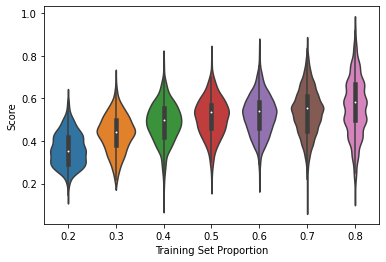

In [19]:
training_size = np.arange(0.8, 0.1, -0.1)

knn = KNeighborsClassifier(n_neighbors=5)
number_of_trials = 1000
number_of_rows = training_size * number_of_trials

train_results = pd.DataFrame({"Training Set Proportion": np.empty(number_of_trials, dtype=np.float32),
                              "Trial": np.empty(number_of_trials, dtype=np.int16),
                              "Score": np.empty(number_of_trials, dtype=np.float32)})

# We'll generate 1000 samples per training dataset size to see how the distribution looks like
for counter, size in enumerate(training_size):
    for trial in range(number_of_trials):
        X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=1-size)
        knn.fit(X_train, y_train)
        real_row = trial + (counter * number_of_trials)
        train_results.loc[real_row, :] = (size, counter, knn.score(X_test, y_test))

_ = sns.violinplot(data=train_results, x="Training Set Proportion", y="Score")

As expected, the higher the training dataset is, the better the accuracy we achieve.

To wrap up the kNN algorithm, we'll review the four things a kNN needs to be specified with:

1. A distance metric - how to check which is the closest data point to our new testing point.
2. How many "nearest" neighbors to look at?
3. Weighting function on the neighbor points - in our case we didn't use any function, but we could try to make the closer neighbors have more points.
4. How to sum the votes of the neighbors - majority vote in our case.

## Unsupervised Learning Example: The Iris Dataset

The second example I wish to show here is for a unsupervised learning procedure. We'll again use a dataset with four dimensions, or four features per sample, called the Iris Dataset. It can be obtained with the Seaborn data visualization package as a Pandas `DataFrame`:

In [23]:
import seaborn as sns

iris = sns.load_dataset('iris')

In [24]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


A short examination of the data is always useful. We see the four mentioned features of the data, while the last column is the true species of that specific iris.

Our goal is to first visualize the data. Due to our inherent difficulty in visualizing 4D objects, we'll have to reduce the dimensionality of the data first. This can be done in a number of ways - let's look at seaborn's pair plot again:

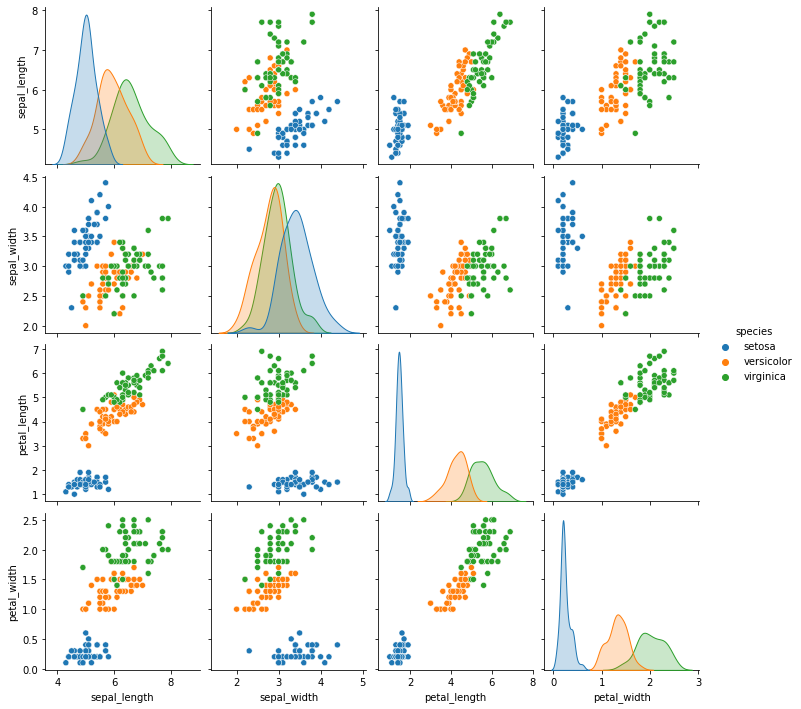

In [25]:
sns.pairplot(data=iris, hue="species")

This gives us a nice overview of the data.

We can also reduce the dimensionality of the data using some algorithm, of course. Its task is to find "new dimensions" that retain the essential features of the data. The algorithm we'll use is PCA, or principle component analysis. While it's not a ML algorithm, it shares many of its properties with ML algorithms, and it's also useful as a basic attempt at classification - and thus it found its way into scikit-learn. After the visualization part we'll cluster the data with a "real" unsupervised learning algorithm.

In [26]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)

X_iris = iris.drop('species', axis=1)  # drop the labels of the data

model.fit(X_iris)  # notice how the labels aren't specified
X_2D = model.transform(X_iris)  # turn the data into a 2D np.ndarray

In [27]:
# Display the result with a scatter plot
data_dict = dict(PCA1=X_2D[:, 0], PCA2=X_2D[:, 1], species=iris['species'])
iris_results = pd.DataFrame(data_dict)

Happily, this worked out quite well. However, the same plot without the coloring used to specify the iris type would look rather convoluted. The left blob of data is distinct, but the other two are bunched together, and a-priori we would have a hard time telling which points belongs to each dataset:

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

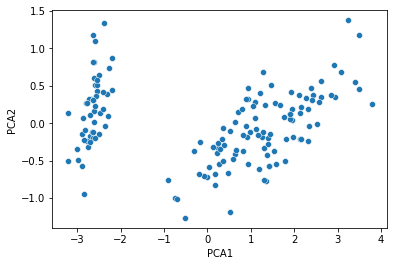

In [28]:
sns.scatterplot(data=iris_results, x='PCA1', y='PCA2')

Assuming we have no labels, which is usually the case when using unsupervised algorithms, we want the output to tell us which point belongs to which iris type.

We'll use Gaussian Mixture Models (GMM), an extension of the relatively popular k-Means Clustering algorithm. The basic idea is to use algorithms like k-Means to find clusters in the data, but then it defines the "center" of the cluster and draws a circle around that center. Points near the edge of the circle are less likely to be a part of the cluster, which adds a probabilistic aspect to the classification of each point, something that k-Means lacks.

GMMs are very popular and found their way into scikit-learn's API:

In [29]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)  # again, no labels are given
iris_results['gmm_results'] = model.predict(X_iris)

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

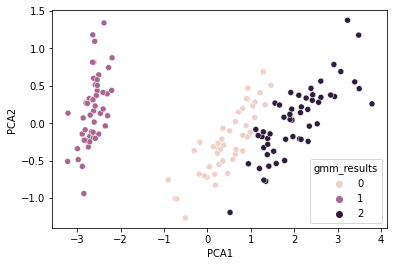

In [30]:
# Plot the results
sns.scatterplot(data=iris_results, x='PCA1', y='PCA2', hue='gmm_results')

We see that the results are very similar to the true results seen above, which is nice. Let's look at the error rate:

In [31]:
# Compare true and GMM results
convert_to_int = {'setosa': 1, 'versicolor': 2, 'virginica': 0}
iris_results['species_index'] = iris_results['species'].apply(lambda x: convert_to_int[x])
rows_with_a_diff = np.nonzero((iris_results['gmm_results'] - iris_results['species_index']).to_numpy())[0]
print(f"The error proportion of the GMM is: {len(rows_with_a_diff) / len(iris_results)}")

The error proportion of the GMM is: 0.6333333333333333


There are many other examples of unsupervised learning algorithms. A very famous one is this neural network which learned to play Mario:

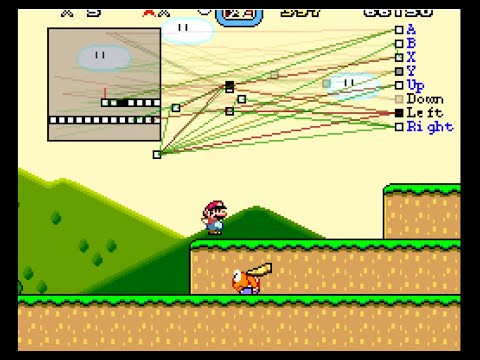

In [32]:
from IPython.display import YouTubeVideo

YouTubeVideo("qv6UVOQ0F44", 600, 450)

## Choosing the Right Algorithm

One of the largest concerns when trying to deploy an ML model is to choose the right model from the get-go. While this can be difficult, the chart below might provide a hint on the way to do so.

![Cheat sheet](ml_map.png)

## Exercise

The problem at hand is classifying images of digits to their correct numerical value. This is how it looks like:

In [62]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape  # 1797 digits, each image has 64 pixels

(1797, 8, 8)

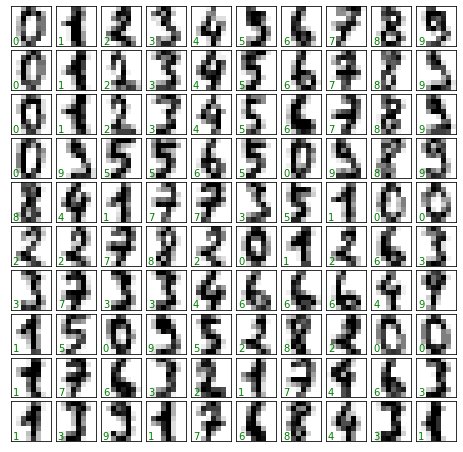

In [63]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

The important thing here is that the data was loaded using the `load_digits()` function, and the actual data resides under the `images` attributes.

Create a training and testing dataset, find a suitable model using the cheat sheet, train it and evaluate its performance.

## Exercise solution below...

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

num_of_digits, x_pix, y_pix = digits.images.shape
flat_digits = digits.images.reshape((num_of_digits, x_pix * y_pix))
Xtrain, Xtest, ytrain, ytest = train_test_split(flat_digits, digits.target, random_state=0)

svc = LinearSVC()
svc.fit(Xtrain, ytrain)

In [ ]:
svc.score(Xtest, ytest)